# Case Study on Regression

The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

# Identify details of data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# Data Preprocessing

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
data.dtypes

Year     int64
Price    int64
dtype: object

# Visualisation

<AxesSubplot:title={'center':'Price Vs Year'}, xlabel='Price', ylabel='Year'>

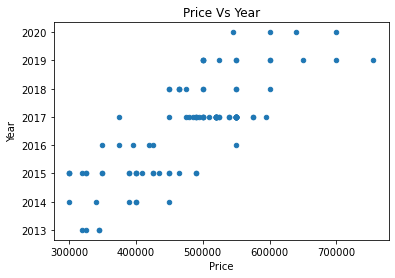

In [9]:
data.plot.scatter(x="Price", y="Year", title="Price Vs Year")

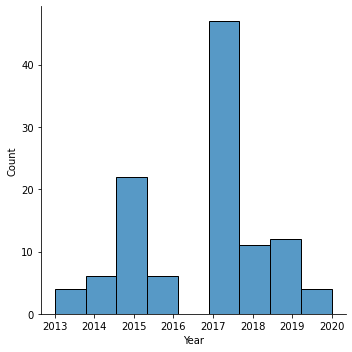

In [10]:
sns.displot(x="Year",data=data)
plt.show()

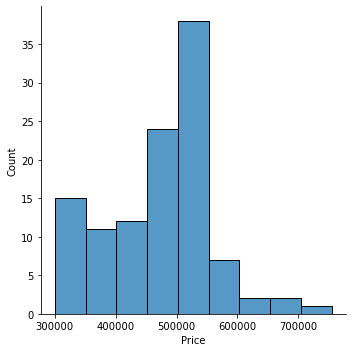

In [11]:
sns.displot(x="Price",data=data)
plt.show()

In [12]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


Since the data doesnt have missing values and outliers, no need to drop any values. Also datatypes are all intergers, hence no need of scoding and scaling required here. Hence we can go directly for machine learning model building to find the best linear relation between the year and price of cars

# Machine learning model building

In [13]:
#declaring x and y variables
X=data["Year"]
y=data["Price"]
print("X is", X)
print("y is", y)

X is 0      2018
1      2019
2      2019
3      2018
4      2018
       ... 
107    2016
108    2014
109    2015
110    2016
111    2015
Name: Year, Length: 112, dtype: int64
y is 0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


In [14]:
#fetching the values from the given column
print(data["Year"].values)

[2018 2019 2019 2018 2018 2015 2016 2017 2017 2017 2019 2018 2017 2019
 2017 2017 2017 2017 2019 2017 2018 2019 2015 2017 2017 2017 2017 2017
 2017 2017 2019 2017 2017 2017 2017 2017 2017 2017 2018 2020 2019 2019
 2018 2019 2019 2018 2019 2018 2016 2018 2013 2018 2013 2013 2017 2017
 2014 2017 2014 2016 2015 2017 2017 2017 2015 2017 2017 2015 2015 2015
 2015 2017 2015 2013 2017 2017 2015 2015 2015 2015 2015 2014 2015 2017
 2015 2015 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2020
 2020 2020 2016 2015 2015 2017 2014 2014 2015 2016 2014 2015 2016 2015]


In [33]:
#reshaping it to our expected format to feed into the model

X=data["Year"].values.reshape(-1, 1)
y=data["Price"].values.reshape(-1, 1)
print(X,y)

[[2018]
 [2019]
 [2019]
 [2018]
 [2018]
 [2015]
 [2016]
 [2017]
 [2017]
 [2017]
 [2019]
 [2018]
 [2017]
 [2019]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2018]
 [2019]
 [2015]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2018]
 [2020]
 [2019]
 [2019]
 [2018]
 [2019]
 [2019]
 [2018]
 [2019]
 [2018]
 [2016]
 [2018]
 [2013]
 [2018]
 [2013]
 [2013]
 [2017]
 [2017]
 [2014]
 [2017]
 [2014]
 [2016]
 [2015]
 [2017]
 [2017]
 [2017]
 [2015]
 [2017]
 [2017]
 [2015]
 [2015]
 [2015]
 [2015]
 [2017]
 [2015]
 [2013]
 [2017]
 [2017]
 [2015]
 [2015]
 [2015]
 [2015]
 [2015]
 [2014]
 [2015]
 [2017]
 [2015]
 [2015]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2020]
 [2020]
 [2020]
 [2016]
 [2015]
 [2015]
 [2017]
 [2014]
 [2014]
 [2015]
 [2016]
 [2014]
 [2015]
 [2016]
 [2015]] [[465000]
 [755000]
 [700000]
 [465000]
 [465000]
 [350000]
 [425000]
 [575000]
 [509999]
 [575000]
 [5

In [34]:
#split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=143)
print("X_train is", X_train)
print("y_train is\n", y_train)
X_train.shape

X_train is [[2013]
 [2015]
 [2019]
 [2015]
 [2014]
 [2017]
 [2018]
 [2019]
 [2017]
 [2018]
 [2015]
 [2017]
 [2019]
 [2017]
 [2018]
 [2020]
 [2016]
 [2017]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2014]
 [2018]
 [2017]
 [2017]
 [2013]
 [2016]
 [2017]
 [2014]
 [2017]
 [2018]
 [2019]
 [2019]
 [2015]
 [2016]
 [2017]
 [2013]
 [2013]
 [2017]
 [2017]
 [2018]
 [2015]
 [2017]
 [2015]
 [2019]
 [2014]
 [2015]
 [2017]
 [2015]
 [2020]
 [2017]
 [2020]
 [2015]
 [2016]
 [2017]
 [2019]
 [2014]
 [2017]
 [2018]
 [2017]
 [2017]
 [2015]
 [2017]
 [2015]
 [2015]
 [2015]
 [2017]
 [2017]
 [2015]
 [2019]
 [2016]
 [2017]
 [2017]
 [2019]
 [2019]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2018]
 [2014]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]]
y_train is
 [[325000]
 [425000]
 [600000]
 [450000]
 [400000]
 [525000]
 [500000]
 [550000]
 [490000]
 [500000]
 [300000]
 [550000]
 [650000]
 [525000]
 [465000]
 [600000]
 [420000]
 [550000]
 [396000]
 [550000]
 [520000]
 [550000]
 [520000]
 [341000]
 [465000]
 [550000]
 [52

(89, 1)

In [35]:
#train our linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [36]:
#lets fit the data
regressor.fit(X_train,y_train)

LinearRegression()

In [39]:
#make a prediction
pred=regressor.predict([[2013]])
print("For the given Year the car price will be:",pred)

For the given Years the car price will be: [[327338.44874223]]


In [41]:
y_pred=regressor.predict(X_test)
print("y_pred for the given test data is \n", y_pred)

y_pred for the given test data is 
 [[411449.8260752 ]
 [495561.20340817]
 [411449.8260752 ]
 [495561.20340817]
 [495561.20340817]
 [411449.8260752 ]
 [495561.20340817]
 [411449.8260752 ]
 [495561.20340817]
 [411449.8260752 ]
 [495561.20340817]
 [621728.26940763]
 [537616.89207466]
 [495561.20340817]
 [495561.20340817]
 [579672.58074114]
 [579672.58074114]
 [495561.20340817]
 [537616.89207466]
 [495561.20340817]
 [495561.20340817]
 [411449.8260752 ]
 [537616.89207466]]


In [42]:
from sklearn.metrics import r2_score, mean_squared_error
print("R squared value is",r2_score(y_test,y_pred))
print("Mean squared error is", mean_squared_error(y_test,y_pred))

R squared value is 0.6159560502733572
Mean squared error is 2832632424.3420053


# Find the best linear relationship between year and price.

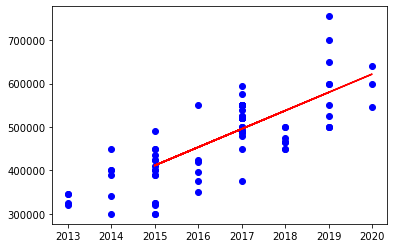

In [59]:
plt.scatter(X_train, y_train,color='b') 
plt.plot(X_test, y_pred,color='r') 
plt.show()

# Can you predict the possible price of a 2022 model second-hand grand i10?

In [43]:
pred=regressor.predict([[2022]])
print("For the given Year the car price will be:",pred)

For the given Year the car price will be: [[705839.6467406]]


# Output
Possible price of a 2022 model second -hand grand i10 will be 705839.6467

# Lasso regression


In [44]:
from sklearn.linear_model import Lasso

In [45]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.6159542505327076, 0.5926752043928567)

In [52]:
y_prd=lasso.predict(X_test)

In [54]:
print("mse = ",mean_squared_error(y_test, y_pred))

mse =  2832632424.3420053


In [55]:
print("R squared value is",r2_score(y_test,y_pred))

R squared value is 0.6159560502733572


# OUTPUT

Both Linear regression and Lasso model is having same R2 score and MSE value. Hence both are performing well to predict the price of car for a given year